<a href="https://colab.research.google.com/github/cheesecakephobia/Kaggle-Fashion_MNIST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Kaggle/Fashion_MNIST/fashion-mnist_train.csv')

In [ ]:
X_train = df_train.drop(columns = 'label')/255
y_train = df_train['label']

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Kaggle/Fashion_MNIST/fashion-mnist_test.csv')

In [ ]:
X_test = df_test.drop(columns = 'label')/255
y_test = df_test['label']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 3)

In [ ]:
X_train.shape

(48000, 784)

Text(0.5, 1.0, 'Pullover')

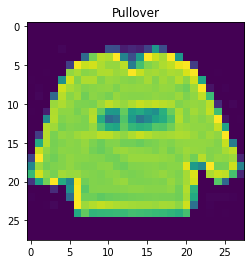

In [ ]:
class_names = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}
plt.imshow(np.array(X_train.loc[0, :]).reshape(28,28))
plt.title('{}'.format(class_names[y_train[0]]))

Text(0.5, 1.0, 'Coat')

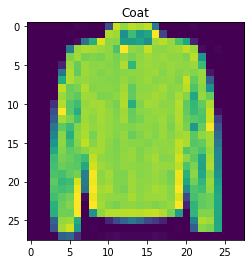

In [ ]:
plt.imshow(np.array(X_train.loc[8, :]).reshape(28,28))
plt.title('{}'.format(class_names[y_train[8]]))

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)

In [ ]:
y_train = to_categorical(y_train, num_classes= 10)
y_val = to_categorical(y_val, num_classes= 10)

In [ ]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [ ]:
model = Sequential()
model.add(Conv2D(filters= 30, kernel_size= 3 , activation= 'relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size= 2))
Dropout(.2)
model.add(Flatten())
model.add(Dense(10, activation= 'softmax'))

In [ ]:
model.compile(loss= 'categorical_crossentropy', optimizer= 'adam', metrics= ['acc'])

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size = 4096,
                    epochs = 100)

Epoch 1/100
12/12 [==============================] - 17s 1s/step - loss: 1.7726 - acc: 0.5136 - val_loss: 1.2012 - val_acc: 0.6842
Epoch 2/100
12/12 [==============================] - 16s 1s/step - loss: 0.9754 - acc: 0.7145 - val_loss: 0.7901 - val_acc: 0.7476
Epoch 3/100
12/12 [==============================] - 16s 1s/step - loss: 0.7296 - acc: 0.7592 - val_loss: 0.6587 - val_acc: 0.7806
Epoch 4/100
12/12 [==============================] - 16s 1s/step - loss: 0.6361 - acc: 0.7841 - val_loss: 0.5929 - val_acc: 0.7943
Epoch 5/100
12/12 [==============================] - 16s 1s/step - loss: 0.5829 - acc: 0.8000 - val_loss: 0.5529 - val_acc: 0.8057
Epoch 6/100
12/12 [==============================] - 16s 1s/step - loss: 0.5465 - acc: 0.8128 - val_loss: 0.5212 - val_acc: 0.8207
Epoch 7/100
12/12 [==============================] - 16s 1s/step - loss: 0.5180 - acc: 0.8233 - val_loss: 0.4959 - val_acc: 0.8289
Epoch 8/100
12/12 [==============================] - 16s 1s/step - loss: 0.4962 - a

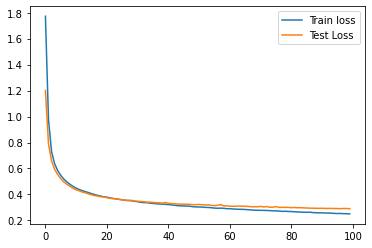

In [ ]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

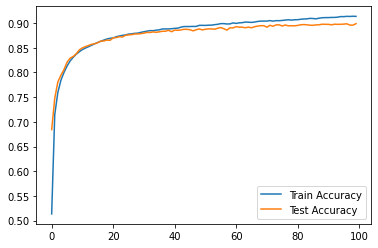

In [ ]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [ ]:
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)
preds = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
accuracy_score(y_test, preds)

0.903